In [ ]:
import pandas as pd
import pandas as pd

c_df = pd.read_csv('./datasets/HorseRacing.csv', low_memory=False)
c_df


,Course country,Course date,Abandoned,Runners,Non-runners,Course name,Course time,Name,Distance,Race type,...,T&S SR runs,T&S SR win A/E,T&S SR wins P&L,T&S SR places %,T&S SR places,T&S SR place runs,T&S SR places A/E,T&S SR places P&L,Top1,GroupID
0,England,"Sunday November 1, 2020",False,6,0,Carlisle,13:35,Gordon Richards Novices Limited Handicap Chase...,2m 4f,Chase,...,10.0,0.85,1.77,40.00,4.0,10.0,0.82,-2.82,0,8613
1,England,"Sunday November 1, 2020",False,6,0,Carlisle,13:35,Gordon Richards Novices Limited Handicap Chase...,2m 4f,Chase,...,112.0,1.09,48.20,36.36,40.0,110.0,0.90,-9.29,0,8613
2,England,"Sunday November 1, 2020",False,6,0,Carlisle,13:35,Gordon Richards Novices Limited Handicap Chase...,2m 4f,Chase,...,57.0,0.89,-26.42,41.82,23.0,55.0,1.18,13.85,1,8613
3,England,"Sunday November 1, 2020",False,6,0,Carlisle,13:35,Gordon Richards Novices Limited Handicap Chase...,2m 4f,Chase,...,53.0,1.08,6.83,45.28,24.0,53.0,0.95,-7.04,0,8613
4,England,"Sunday November 1, 2020",False,6,0,Carlisle,13:35,Gordon Richards Novices Limited Handicap Chase...,2m 4f,Chase,...,16.0,0.36,-11.04,37.50,6.0,16.0,0.86,-3.27,0,8613
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13123,England,Sunday June 20th 2021,False,6,1,Hexham,16:45,Ne-Bet Sportsbook And Casino. Handicap Chase (...,2m 4f 15y,Chase,...,17.0,1.00,-4.74,41.18,7.0,17.0,1.21,3.03,0,8133
13124,England,Sunday June 20th 2021,False,6,1,Hexham,16:45,Ne-Bet Sportsbook And Casino. Handicap Chase (...,2m 4f 15y,Chase,...,97.0,0.95,54.08,34.38,33.0,96.0,1.13,25.06,1,8133
13125,England,Sunday June 20th 2021,False,6,1,Hexham,16:45,Ne-Bet Sportsbook And Casino. Handicap Chase (...,2m 4f 15y,Chase,...,20.0,0.89,-8.87,15.00,3.0,20.0,0.46,-12.51,0,8133
13126,England,Sunday June 20th 2021,False,6,1,Hexham,16:45,Ne-Bet Sportsbook And Casino. Handicap Chase (...,2m 4f 15y,Chase,...,13.0,0.00,-13.00,7.69,1.0,13.0,0.60,-9.35,0,8133


In [43]:
c_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13128 entries, 0 to 13127
Columns: 428 entries, Course country to GroupID
dtypes: bool(2), float64(385), int64(26), object(15)
memory usage: 42.7+ MB


In [44]:
def parse_distance(distance_str):
    # "2m 4f"와 같은 문자열을 파싱하여 킬로미터로 변환하는 함수
    
    # 공백을 기준으로 문자열을 분리
    parts = distance_str.split()

    # 마일, 퍼롱, 야드 값을 초기화
    miles = 0
    furlongs = 0
    yards = 0

    # 각 단위를 파싱하여 값으로 변환
    for part in parts:
        if 'm' in part:  # 마일인 경우
            miles += int(part[:-1])
        elif 'f' in part:  # 퍼롱인 경우
            furlongs += int(part[:-1])
        elif 'y' in part:  # 야드인 경우
            yards += int(part[:-1])
    
    # 킬로미터로 변환
    total_km = miles * 1.60934 + furlongs * 0.201168 + yards * 0.0009144
    
    return total_km

# "Distance" 열의 각 항목을 순회하면서 킬로미터로 변환
# "Distance" 열의 각 항목을 순회하면서 킬로미터로 변환하여 새로운 열에 저장
c_df["km"] = c_df["Distance"].map(parse_distance)

In [45]:
c_df = c_df.drop(labels=['Course date', 
                         'Abandoned', 
                         'Name', 
                         'Race type', 
                         'Handicap', 
                         'Course time',
                         'Horse name', 
                         'Trainer name',
                         'Jockey name', 
                         'Sire name', 
                         'Distance',
                        'GroupID',
                         'Form',
                        ], axis=1)
c_df.rename(columns={'Value %': 'Value'}, inplace=True)
c_df['Win Odds'] = c_df.pop('Win Odds')

In [46]:
from sklearn.preprocessing import LabelEncoder

# dd = d_df.copy()
columns = ['Course country', 'Ages', 'Course name', 'Going', 'Horse nationality', 'Sex']
label_encoders = {}

for column in columns:
    encoder = LabelEncoder()
    result = encoder.fit_transform(c_df[column])
    label_encoders[column] = encoder.classes_
    c_df[column] = result

# label_encoders

In [47]:
from sklearn.model_selection import train_test_split

features, targets = c_df.iloc[:, :-1], c_df.iloc[:, -1]

X_train, X_test, y_train, y_test = \
train_test_split(features, targets, test_size=0.2, random_state=124)

train_df = pd.concat([X_train, y_train], axis=1).reset_index(drop=True)
test_df = pd.concat([X_test, y_test], axis=1).reset_index(drop=True)


In [29]:
from sklearn.decomposition import PCA

for i in range(20):
    pca = PCA(n_components=(i + 1))
    
    pca_train = pca.fit_transform(features)
    pca_test = pca.fit_transform(features)

    print(pca.explained_variance_ratio_.sum())

0.5521435992378145
0.7896839496985282
0.9178238490765998
0.9323303786850137
0.9456985940640739
0.9577885679676922
0.9670288409578991
0.9724288968342123
0.9762109086022255
0.979666820764318
0.9824457218196092
0.9843573841102243
0.9858817172444546
0.9871953235740666
0.9882832760724514
0.9892375462843823
0.9900767706565051
0.9907128533748107
0.9913325353409187
0.9919193140207567


In [48]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.decomposition import PCA

features, targets = c_df.iloc[:, :-1], c_df.iloc[:, -1]

X_train, X_test, y_train, y_test = \
train_test_split(features, targets, test_size=0.2, random_state=124)

l_r = LinearRegression()

pipe = Pipeline([('std', StandardScaler()), ('pca', PCA(n_components=100)), ('l_r', l_r)])
pipe.fit(X_train, y_train)

Pipeline(steps=[('std', StandardScaler()), ('pca', PCA(n_components=100)),
                ('l_r', LinearRegression())])

In [31]:
# import numpy as np
# from sklearn.metrics import mean_squared_log_error, mean_squared_error, r2_score

# def get_evaluation(y_test, prediction):
#     MSE = mean_squared_error(y_test, prediction)
#     RMSE = np.sqrt(MSE)
#     MSLE = mean_squared_log_error(y_test, prediction)
#     RMSLE = np.sqrt(mean_squared_log_error(y_test, prediction))
#     R2 = r2_score(y_test, prediction)
#     print('MSE: {:.4f}, RMSE: {:.4f}, MSLE: {:.4f}, RMSLE: {:.4f}, R2: {:.4f}'\
#           .format(MSE, RMSE, MSLE, RMSLE, R2))


import numpy as np
from sklearn.metrics import mean_squared_log_error, mean_squared_error, r2_score

def get_evaluation(y_test, prediction):
    MSE = mean_squared_error(y_test, prediction)
    RMSE = np.sqrt(MSE)

    R2 = r2_score(y_test, prediction)

    print('MSE: {:.4f}, RMSE: {:.4f}, R2: {:.4f}'\
      .format(MSE, RMSE,  R2))

In [49]:
prediction = pipe.predict(X_test)
get_evaluation(y_test, prediction)

MSE: 1639.2429, RMSE: 40.4876, R2: 0.4765


In [50]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

features, targets = c_df.iloc[:, :-1], c_df.iloc[:, -1]

X_train, X_test, y_train, y_test = \
train_test_split(features, targets, test_size=0.2, random_state=124)

l_r = LinearRegression()
l_r.fit(X_train.values, y_train.values)
prediction = l_r.predict(X_test.values)
get_evaluation(y_test.values, prediction)

MSE: 677.3734, RMSE: 26.0264, R2: 0.7837


In [39]:
from sklearn.preprocessing import PolynomialFeatures

features, targets = c_df.iloc[:, :-1], c_df.iloc[:, -1]
poly_features = PolynomialFeatures(degree=2).fit_transform(features)

X_train, X_test, y_train, y_test = \
train_test_split(poly_features, targets, test_size=0.2, random_state=124)

l_r = LinearRegression()
l_r.fit(X_train, y_train)

LinearRegression()

In [41]:
prediction = l_r.predict(X_test.values)
get_evaluation(y_test.values, prediction)

ValueError: X has 415 features, but LinearRegression is expecting 86736 features as input.

In [51]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.decomposition import PCA
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Ridge
from sklearn.linear_model import LinearRegression


features, targets = c_df.iloc[:, :-1], c_df.iloc[:, -1]

X_train, X_test, y_train, y_test = \
train_test_split(features, targets, test_size=0.2, random_state=124)

p_l_r = LinearRegression()
dt_r = DecisionTreeRegressor(random_state=124)
rf_r = RandomForestRegressor(random_state=124, n_estimators=1000)
gb_r = GradientBoostingRegressor(random_state=124)
xgb_r = XGBRegressor()
lgb_r = LGBMRegressor(n_estimators=100)
ridge = Ridge(alpha=10000, random_state=124)  # alpha는 규제 강도를 조절하는 하이퍼파라미터입니다.

models = [p_l_r, dt_r, gb_r, xgb_r, lgb_r, ridge]
for model in models:
    pipe = Pipeline([('std', StandardScaler()), ('pca', PCA(n_components=100)), (f'{model.__class__.__name__}', model)])
    pipe.fit(X_train, y_train)
    prediction = pipe.predict(X_test)
    print(model.__class__.__name__)
    get_evaluation(y_test, prediction)

LinearRegression
MSE: 1612.2211, RMSE: 40.1525, R2: 0.4852
DecisionTreeRegressor
MSE: 3116.8241, RMSE: 55.8285, R2: 0.0047
GradientBoostingRegressor
MSE: 1347.5098, RMSE: 36.7084, R2: 0.5697
XGBRegressor
MSE: 1113.8401, RMSE: 33.3742, R2: 0.6443
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.004956 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 25500
[LightGBM] [Info] Number of data points in the train set: 10502, number of used features: 100
[LightGBM] [Info] Start training from score 23.287858
LGBMRegressor
MSE: 1135.4975, RMSE: 33.6971, R2: 0.6374
Ridge
MSE: 1844.2429, RMSE: 42.9446, R2: 0.4111


MSE: 344.7394, RMSE: 18.5672, R2: 0.8130
MSE: 677.3734, RMSE: 26.0264, R2: 0.7837


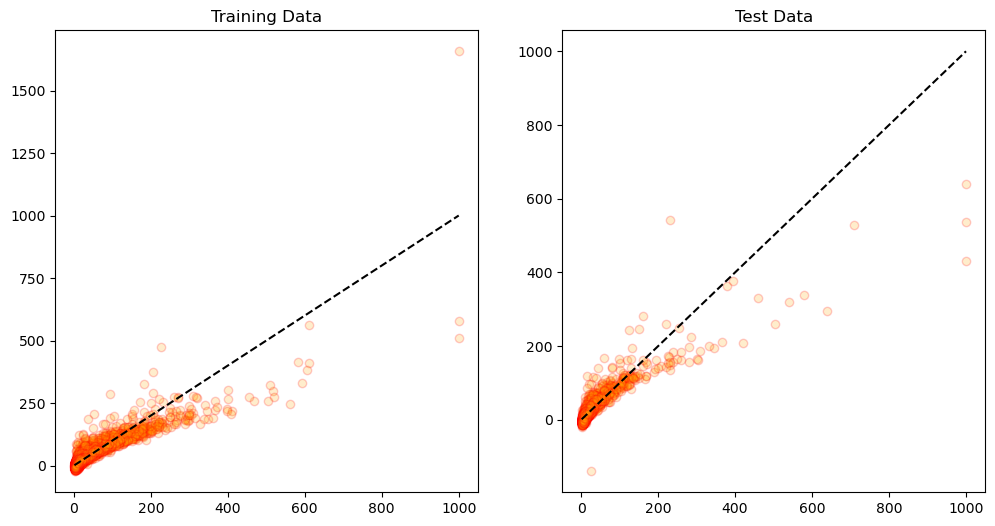

In [53]:
import matplotlib.pyplot as plt

# 첫 번째 그래프
p_l_r.fit(X_train, y_train)
prediction_train = p_l_r.predict(X_train)
get_evaluation(y_train, prediction_train)

fig, axs = plt.subplots(1, 2, figsize=(12, 6))

# 훈련 데이터 예측 결과
axs[0].scatter(y_train, prediction_train, edgecolors='red', c='orange', alpha=0.2)
axs[0].plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'k--')
axs[0].set_title('Training Data')

# 두 번째 그래프
p_l_r.fit(X_train, y_train)
prediction_test = p_l_r.predict(X_test)
get_evaluation(y_test, prediction_test)

# 테스트 데이터 예측 결과
axs[1].scatter(y_test, prediction_test, edgecolors='red', c='orange', alpha=0.2)
axs[1].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--')
axs[1].set_title('Test Data')

plt.show()


In [54]:
from sklearn.preprocessing import PowerTransformer

# ccc = c_df.columns

# box-cox: 양수만 가능
# yeo-johnson: 음수, 0 포함 가능, default

# ptf = PowerTransformer(method='box-cox', standardize=False)
ptf = PowerTransformer(standardize=False)


result = ptf.fit_transform(c_df[['Win Odds']])
c_df['Win Odds'] = result

In [55]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.decomposition import PCA
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Ridge
from sklearn.linear_model import LinearRegression


features, targets = c_df.iloc[:, :-1], c_df.iloc[:, -1]

X_train, X_test, y_train, y_test = \
train_test_split(features, targets, test_size=0.2, random_state=124)

p_l_r = LinearRegression()
dt_r = DecisionTreeRegressor(random_state=124)
rf_r = RandomForestRegressor(random_state=124, n_estimators=1000)
gb_r = GradientBoostingRegressor(random_state=124)
xgb_r = XGBRegressor()
lgb_r = LGBMRegressor(n_estimators=100)
ridge = Ridge(alpha=10000, random_state=124)  # alpha는 규제 강도를 조절하는 하이퍼파라미터입니다.

models = [p_l_r, dt_r, gb_r, xgb_r, lgb_r, ridge]
for model in models:
    pipe = Pipeline([('std', StandardScaler()), ('pca', PCA(n_components=100)), (f'{model.__class__.__name__}', model)])
    pipe.fit(X_train, y_train)
    prediction = pipe.predict(X_test)
    print(model.__class__.__name__)
    get_evaluation(y_test, prediction)

LinearRegression
MSE: 0.0337, RMSE: 0.1836, R2: 0.6562
DecisionTreeRegressor
MSE: 0.1150, RMSE: 0.3391, R2: -0.1730
GradientBoostingRegressor
MSE: 0.0475, RMSE: 0.2180, R2: 0.5155
XGBRegressor
MSE: 0.0448, RMSE: 0.2116, R2: 0.5435
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.005655 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 25500
[LightGBM] [Info] Number of data points in the train set: 10502, number of used features: 100
[LightGBM] [Info] Start training from score 1.635735
LGBMRegressor
MSE: 0.0410, RMSE: 0.2026, R2: 0.5814
Ridge
MSE: 0.0371, RMSE: 0.1925, R2: 0.6219


MSE: 0.0000, RMSE: 0.0046, R2: 0.9998
MSE: 0.0003, RMSE: 0.0167, R2: 0.9972


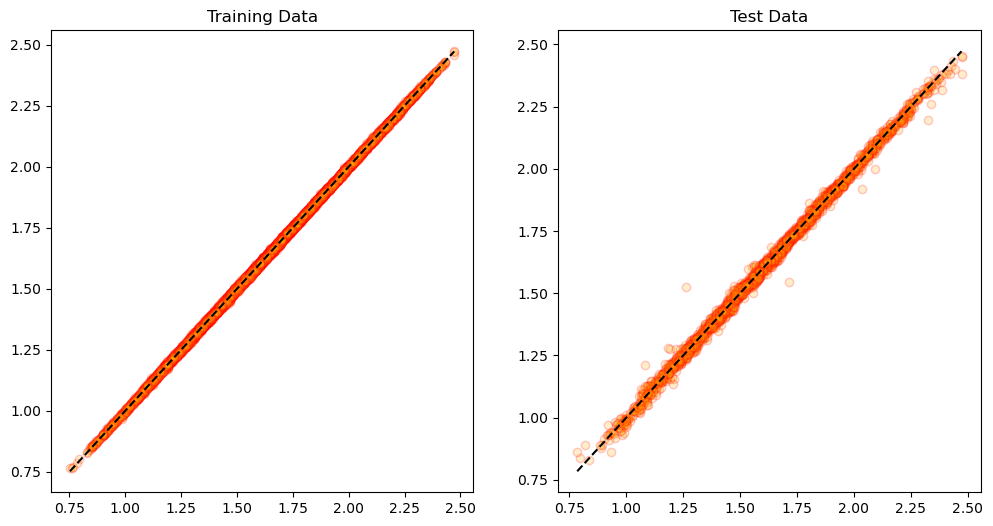

In [56]:
import matplotlib.pyplot as plt

# 첫 번째 그래프
xgb_r.fit(X_train, y_train)
prediction_train = xgb_r.predict(X_train)
get_evaluation(y_train, prediction_train)

fig, axs = plt.subplots(1, 2, figsize=(12, 6))

# 훈련 데이터 예측 결과
axs[0].scatter(y_train, prediction_train, edgecolors='red', c='orange', alpha=0.2)
axs[0].plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'k--')
axs[0].set_title('Training Data')

# 두 번째 그래프
xgb_r.fit(X_train, y_train)
prediction_test = xgb_r.predict(X_test)
get_evaluation(y_test, prediction_test)

# 테스트 데이터 예측 결과
axs[1].scatter(y_test, prediction_test, edgecolors='red', c='orange', alpha=0.2)
axs[1].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--')
axs[1].set_title('Test Data')

plt.show()


MSE: 0.0249, RMSE: 0.1577, R2: 0.7350
MSE: 0.0279, RMSE: 0.1670, R2: 0.7157


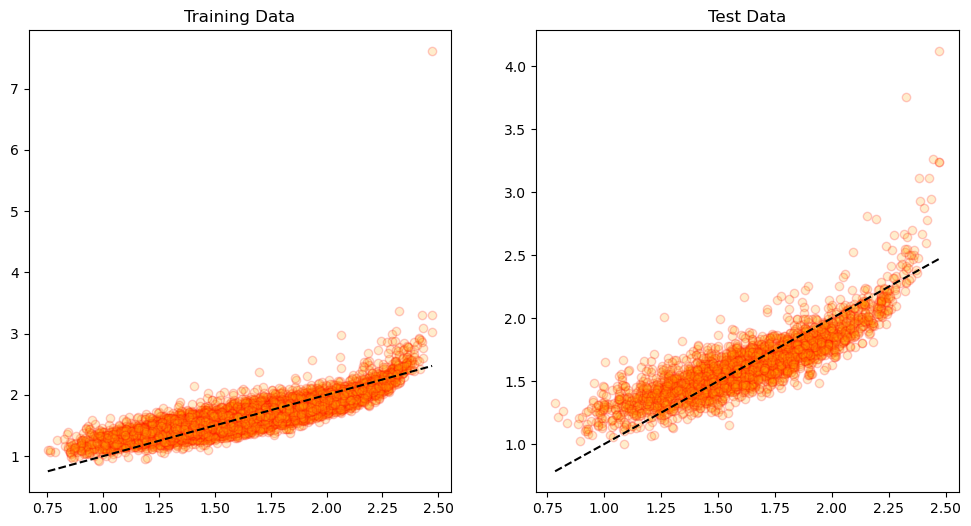

In [57]:
import matplotlib.pyplot as plt

# 첫 번째 그래프
p_l_r.fit(X_train, y_train)
prediction_train = p_l_r.predict(X_train)
get_evaluation(y_train, prediction_train)

fig, axs = plt.subplots(1, 2, figsize=(12, 6))

# 훈련 데이터 예측 결과
axs[0].scatter(y_train, prediction_train, edgecolors='red', c='orange', alpha=0.2)
axs[0].plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'k--')
axs[0].set_title('Training Data')

# 두 번째 그래프
p_l_r.fit(X_train, y_train)
prediction_test = p_l_r.predict(X_test)
get_evaluation(y_test, prediction_test)

# 테스트 데이터 예측 결과
axs[1].scatter(y_test, prediction_test, edgecolors='red', c='orange', alpha=0.2)
axs[1].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--')
axs[1].set_title('Test Data')

plt.show()


In [67]:
import torch
from torch.optim import SGD
from sklearn.model_selection import train_test_split

torch.manual_seed(124)

features, targets = c_df.iloc[:, :-1], c_df.iloc[:, -1]

X_train, X_test, y_train, y_test = train_test_split(features, targets, test_size=0.2, random_state=124)
X_train_val, X_test_val, y_train_val, y_test_val =\
    train_test_split(X_train, y_train, test_size=0.2, random_state=124)

X_train_val = torch.FloatTensor(X_train_val.values)
y_train_val = torch.FloatTensor(y_train_val.values).view(-1, 1)

X_test_val = torch.FloatTensor(X_test_val.values)
y_test_val = torch.FloatTensor(y_test_val.values).view(-1, 1)

train_losses = []
val_losses = []

# W_train = torch.nn.Parameter(torch.FloatTensor(l_r.coef_))
# b_train = torch.nn.Parameter(torch.tensor(l_r.intercept_))
W_train = torch.zeros((415, 1), requires_grad=True)
b_train = torch.zeros(1, requires_grad=True)

W_val = torch.zeros((415, 1), requires_grad=True)
b_val = torch.zeros(1, requires_grad=True)

optimizer_train = SGD([W_train, b_train], lr=0.00019)
optimizer_val = SGD([W_val, b_val], lr=0.00019)

In [64]:
# 검증 데이터를 포함하지 않는 훈련 데이터 세트 학습 수행
epochs = 1000

for epoch in range(1, epochs + 1):
    H_train = X_train_val.matmul(W_train) + b_train
    loss_train = torch.mean((y_train_val - H_train) ** 2)

    optimizer_train.zero_grad()
    loss_train.backward()
    optimizer_train.step()

    if epoch % 100 == 0:
        train_losses.append(loss_train.item())

    if epoch % 100 == 0:
        print('{:4d}/{}: W1: {:.4f}, W2: {:.4f}, W3: {:.4f}, W4: {:.4f}, b: {:.4f}, loss: {:.4f}'\
            .format(epoch, epochs, W_train[0].item(), W_train[1].item(), \
                    W_train[2].item(), W_train[3].item(), b_train.item(), loss_train.item()))

 100/1000: W1: nan, W2: nan, W3: nan, W4: nan, b: nan, loss: nan
 200/1000: W1: nan, W2: nan, W3: nan, W4: nan, b: nan, loss: nan
 300/1000: W1: nan, W2: nan, W3: nan, W4: nan, b: nan, loss: nan
 400/1000: W1: nan, W2: nan, W3: nan, W4: nan, b: nan, loss: nan
 500/1000: W1: nan, W2: nan, W3: nan, W4: nan, b: nan, loss: nan
 600/1000: W1: nan, W2: nan, W3: nan, W4: nan, b: nan, loss: nan
 700/1000: W1: nan, W2: nan, W3: nan, W4: nan, b: nan, loss: nan
 800/1000: W1: nan, W2: nan, W3: nan, W4: nan, b: nan, loss: nan
 900/1000: W1: nan, W2: nan, W3: nan, W4: nan, b: nan, loss: nan
1000/1000: W1: nan, W2: nan, W3: nan, W4: nan, b: nan, loss: nan


In [65]:
# 검증 데이터 세트 학습 수행
epochs = 1000

for epoch in range(1, epochs + 1):
    H_test = X_test_val.matmul(W_val) + b_val
    loss_test = torch.mean((y_test_val - H_test) ** 2)

    optimizer_val.zero_grad()
    loss_test.backward()
    optimizer_val.step()

    if epoch % 100 == 0:
        val_losses.append(loss_test.item())
        
    if epoch % 100 == 0:
        print('{:4d}/{}: W1: {:.4f}, W2: {:.4f}, W3: {:.4f}, W4: {:.4f}, b: {:.4f}, loss: {:.4f}'\
            .format(epoch, epochs, W_val[0].item(), W_val[1].item(), \
                    W_val[2].item(), W_val[3].item(), b_val.item(), loss_test.item()))

 100/1000: W1: nan, W2: nan, W3: nan, W4: nan, b: nan, loss: nan
 200/1000: W1: nan, W2: nan, W3: nan, W4: nan, b: nan, loss: nan
 300/1000: W1: nan, W2: nan, W3: nan, W4: nan, b: nan, loss: nan
 400/1000: W1: nan, W2: nan, W3: nan, W4: nan, b: nan, loss: nan
 500/1000: W1: nan, W2: nan, W3: nan, W4: nan, b: nan, loss: nan
 600/1000: W1: nan, W2: nan, W3: nan, W4: nan, b: nan, loss: nan
 700/1000: W1: nan, W2: nan, W3: nan, W4: nan, b: nan, loss: nan
 800/1000: W1: nan, W2: nan, W3: nan, W4: nan, b: nan, loss: nan
 900/1000: W1: nan, W2: nan, W3: nan, W4: nan, b: nan, loss: nan
1000/1000: W1: nan, W2: nan, W3: nan, W4: nan, b: nan, loss: nan


In [68]:
import matplotlib.pyplot as plt

train_loss_dict = dict()
val_loss_dict = dict()

for i in range(500):
    train_loss_dict[(i+1)*1000] = train_losses[i]
    val_loss_dict[(i+1)*1000] = val_losses[i]

plt.plot(train_loss_dict.keys(), train_loss_dict.values(), color='r', label='Train set')
plt.plot(val_loss_dict.keys(), val_loss_dict.values(), color='b', label='Validation set')
plt.legend()
plt.show()

IndexError: list index out of range

In [70]:
import torch
from torch.optim import SGD
from torch.nn.functional import mse_loss
from torch.nn import Linear

torch.manual_seed(321)

features, targets = c_df.iloc[:,:-1],c_df.iloc[:,-1]

X_train, X_test, y_train, y_test = \
train_test_split(features,targets, test_size=0.2, random_state=321)

real_X_train, val_X_test, real_y_train, val_y_test = \
train_test_split(X_train, y_train, test_size=0.5, random_state=321)

real_X_train = torch.FloatTensor(X_train.values)
real_y_train = torch.FloatTensor(y_train.values).view(-1, 1)

val_X_test = torch.FloatTensor(X_test.values)
val_y_test = torch.FloatTensor(y_test.values).view(-1, 1)
l_r = Linear(real_X_train.shape[1], 1)  # 입력 차원 동적 할당
optimizer = SGD(l_r.parameters(), lr=1e-7)  # 보다 실용적인 학습률

epochs = 1000000  # 적절한 에포크 수
real_train_loss_history = []
val_test_loss_history = []

for epoch in range(1, epochs + 1):
    l_r.train()
    H = l_r(real_X_train)
    train_loss = mse_loss(real_y_train, H)

    optimizer.zero_grad()
    train_loss.backward()
    optimizer.step()
    
    l_r.eval()
    with torch.no_grad():
        H_test = l_r(val_X_test)
        test_loss = mse_loss(val_y_test, H_test)
        r2 = r2_score(val_y_test, H_test)
    
    real_train_loss_history.append(train_loss.item())
    val_test_loss_history.append(test_loss.item())

    # if epoch % 10000 == 0:
    #     print(f'{epoch}/{epochs}: ', end='')
    #     W = l_r.weight.data.squeeze()
    #     b = l_r.bias.data
    #     for i, w in enumerate(W):
    #         print(f'W{i+1}: {w:.4f}, ', end='')
    #     print(f'b: {b.item():.4f}, Loss: {train_loss.item():.4f}\n')
    if epoch % 10000 == 0:
        print(f'{epoch}/{epochs}: ', end='')
        W = l_r.weight.data.squeeze()
        b = l_r.bias.data
        for i, w in enumerate(W):
            print(f'W{i+1}: {w:.4f}, ', end='')
        print(f'b: {b.item():.4f}, Loss: {test_loss.item():.4f}\n')
        print(f'Test Loss: {test_loss.item():.4f}, R-squared: {r2.item():.4f}')


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:927: RuntimeWarning: overflow encountered in square
  numerator = (weight * (y_true - y_pred) ** 2).sum(axis=0, dtype=np.float64)
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:927: RuntimeWarning: overflow encountered in square
  numerator = (weight * (y_true - y_pred) ** 2).sum(axis=0, dtype=np.float64)
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:927: RuntimeWarning: overflow encountered in square
  numerator = (weight * (y_true - y_pred) ** 2).sum(axis=0, dtype=np.float64)
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:927: RuntimeWarning: overflow encountered in square
  numerator = (weight * (y_true - y_pred) ** 2).sum(axis=0, dtype=np.float64)
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:927: RuntimeWarning: overflow encountered in square
  numerator = (weight * (y_true - y_pred) ** 2).sum(axis=0

ValueError: Input contains infinity or a value too large for dtype('float32').

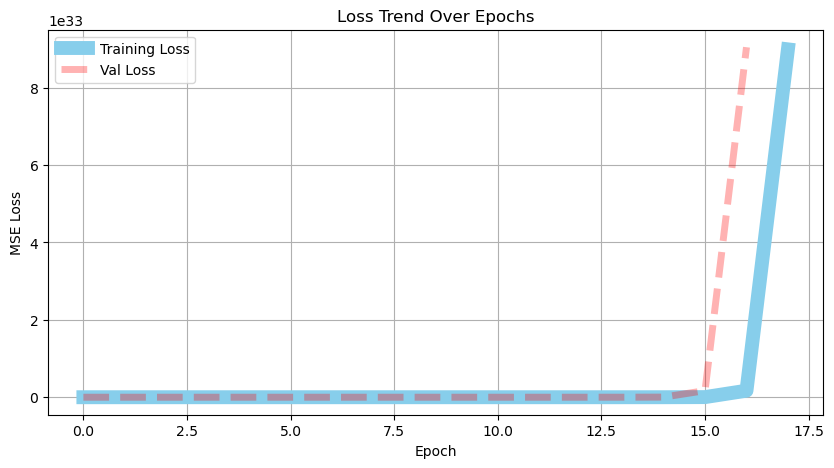

In [71]:
plt.figure(figsize=(10, 5))
plt.plot(real_train_loss_history, label='Training Loss', linewidth=10, color= 'skyblue')
plt.plot(val_test_loss_history, label='Val Loss', linestyle='--' , linewidth=5, alpha=0.3, color='red')
plt.xlabel('Epoch')
plt.ylabel('MSE Loss')
plt.title('Loss Trend Over Epochs')
plt.legend()
plt.grid(True)
plt.show()